<a href="https://colab.research.google.com/github/ebinjomonkottakal/Computer-Vision-Projects/blob/main/Preprocessing_image_data_using_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [102]:
import IPython.display as display
import PIL.Image as image
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [103]:
import pathlib
data_dir = tf.keras.utils.get_file(origin = 'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
fname='flower_photos',untar = True)
data_dir = pathlib.Path(data_dir)

In [104]:
print(len(list(data_dir.glob('*/*.jpg'))))

3670


In [105]:
class_names = np.array([item.name for item in data_dir.glob('*') if item !='LICENSE.txt'])
class_names

array(['daisy', 'LICENSE.txt', 'sunflowers', 'dandelion', 'roses',
       'tulips'], dtype='<U11')

In [153]:
roses = list(data_dir.glob('sunflowers/*'))


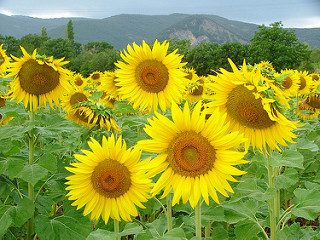

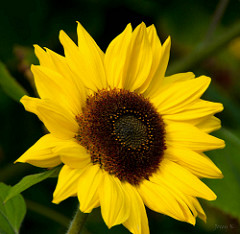

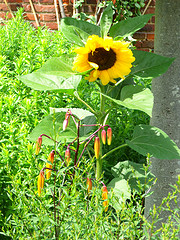

In [108]:
for image_path in roses[:3]:
  display.display(image.open(str(image_path)))

In [109]:
list_df = tf.data.Dataset.list_files(str(data_dir/'*/*'))

In [120]:
def get_labels(file_path):
  parts = tf.strings.split(file_path,'/')
  return parts[-2]

In [121]:
labels = list_df.map(get_labels)

In [124]:
def decode_img(image):
  img = tf.image.decode_jpeg(image,channels =3)
  img = tf.image.convert_image_dtype(img,tf.float32)
  return tf.image.resize(img,[224,224])

In [125]:
def process_image(file_path):
  label = get_labels(file_path)
  img = tf.io.read_file(file_path)
  img = decode_img(img)
  return img,label

In [128]:
df = list_df.map(process_image)

In [147]:
for image,label in df.take(2):
  print(image.shape)

(224, 224, 3)
(224, 224, 3)


In [140]:
def prepare_for_training(ds,cache=True,Buffer_size=1024):
  if cache:
    if(isinstance(cache,str)):
      ds = ds.cache(cache)
    else:
      ds = ds.cache()
  ds = ds.shuffle(buffer_size = Buffer_size).batch(32).prefetch(buffer_size = AUTOTUNE)
  return ds

In [142]:
AUTOTUNE=tf.data.experimental.AUTOTUNE
ds = prepare_for_training(df)

In [148]:
for image,label in ds.take(1):
  print(image.shape)
  print(label.shape)

(32, 224, 224, 3)
(32,)
